# Fraudes em Cartões de Crédito

## Sobre os dados

Os conjuntos de dados contêm transações efetuadas por cartões de crédito em setembro de 2013 por portadores de cartões europeus. Este conjunto de dados apresenta transações que ocorreram em dois dias, onde temos 492 fraudes de 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.

Ele contém apenas variáveis ​​numéricas de entrada que são o resultado de uma transformação do PCA. Os recursos V1, V2, ... V28 são os principais componentes obtidos com o PCA, os únicos recursos que não foram transformados com o PCA são 'Time' e 'Amount'. Recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Valor' é o Montante da transação, esse recurso pode ser usado para aprendizado sensível ao custo dependente de exemplo. Recurso 'Classe' é a variável de resposta e leva valor 1 no caso de fraude e 0 caso contrário.

***

# Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set()

import tqdm

import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False 

### Leitura do dataset

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# Funcao para analise inicial dos dados
def overview(df):
    import missingno as msno
    
    # Head df
    print('\n','='*100, '\n', 'head')
    display(df.head(3))
    
    # Tail df
    print('\n','='*100, '\n', 'tail')
    display(df.tail(3))
    
    # Shape 
    print('\n','='*100, '\n')
    print(f'shape: {df.shape}')
    
    # Colunas numéricas e categóricas
    print('\n','='*100, '\n')
    """ retorna (colunas numericas, colunas categoricas)"""
    print(f'colunas: {df.columns} \n')
    cols = df.columns # Todas as colunas
    num_cols = df._get_numeric_data().columns # Colunas numéricas
    cat_cols =  (set(cols) - set(num_cols)) # Colunas categóricas
    print(f'num_cols (total de {len(num_cols)}): {num_cols}\n')
    print(f'cat_cols (total de {len(cat_cols)}): {cat_cols} - total: {len(cat_cols)}')
      
    # Estatisticas   
    print('\n','='*100, '\n', 'Estatísticas')
    display(df.describe())
    
    print('\n','='*100, '\n', 'df.info()')
    display(df.info())
    
    # Dados Faltantes
    df = df.replace('', np.NaN)
    miss_cols = df.isnull().sum()[df.isnull().sum() != 0]
    print(f'\nQtd. cols com NaNs: {len(miss_cols)}\n')
    print(miss_cols.sort_values(ascending=False))
    msno.matrix(df)


 head


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0



 tail


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0




shape: (284807, 31)


colunas: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object') 

num_cols (total de 31): Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

cat_cols (total de 0): set() - total: 0

 Estatísticas


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



 df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21

None


Qtd. cols com NaNs: 0

Series([], dtype: int64)


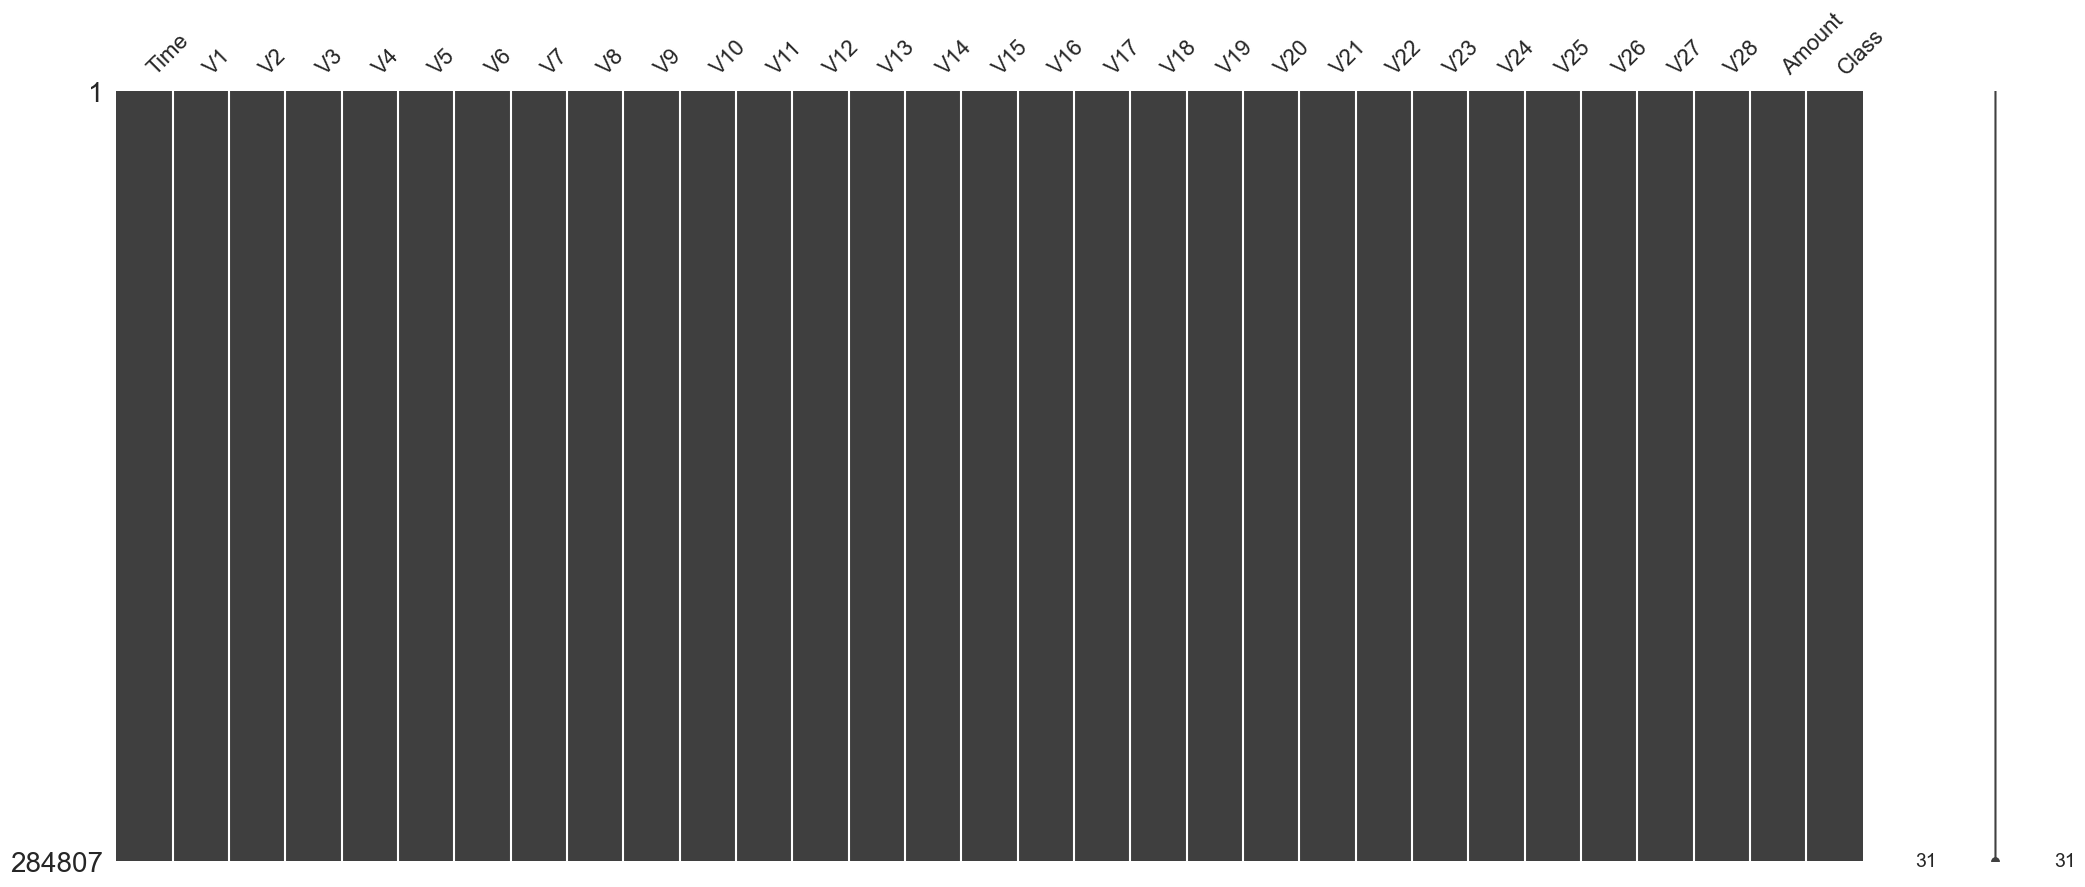

In [4]:
overview(df)

In [5]:
# Imprimindo as estatisticas dos valores de nao-fraude e fraude
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [6]:
# imprimindo as estatisticas dos tempos de nao-fraude e fraude
df.groupby('Class')['Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


Percebe-se que, apesar dos dados estarem bem desbalanceado, as estatísticas de fraude são bastante similares às de não fraude, o que significa de os fraudadores estão preocupados em esconder as transações fraudulentes entre as não-fraudulentes.

# Exploração das variáveis

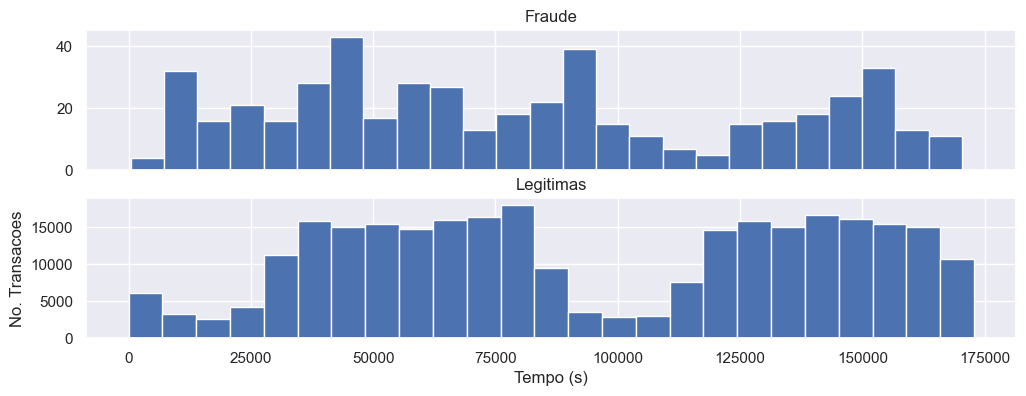

In [7]:
# Plotando o número de transaòes pelo tempo, em segundos 

# Definindo uma matriz de gráficos
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 25

# Plotando o tempo por número de transações das fraudes
ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraude')

# Plotando o tempo por número de transações das não-fraudes
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Legitimas')

# Plotando as legendas dos gráficos
plt.xlabel('Tempo (s)')
plt.ylabel('No. Transacoes')
plt.show()

Nota-se que:
> - (1) Fraudes se espalham ao longo do dia com dois picos (de manhã e a tarde), sendo que
> - (2) No período da tarde, as fraudes se diferenciam bastante com relação as não-fraudes

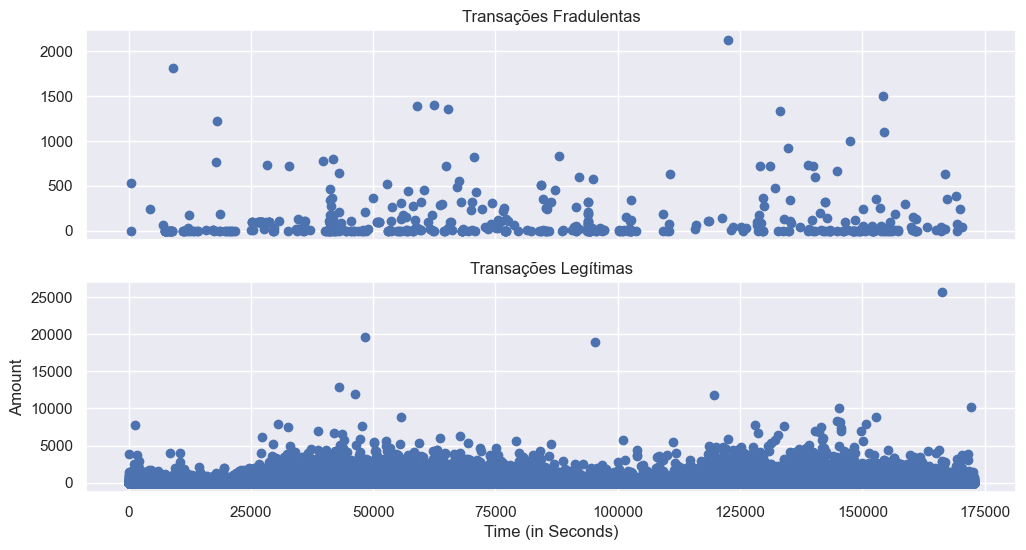

In [8]:
# Plotando o gráfico de dispersão do montante pelo tempo das fraudes e não-fraudes

# Plotando uma matriz de gráficos
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

# Dispersão do montante pelo tempo das fraudes
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Transações Fradulentas')
# Dispersão do montante pelo tempo das não-fraudes
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Transações Legítimas')
# Plotando as legendas dos gráficos
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nota-se que:
> - (1) Com relacao aos outliers, nao há diferenca entre os montantes das transações fraudulentas ou não fraudulentas
> - (2) Será necessário partir para a modelagem estatísticas das features, mesmo sem conhecer quais são suas características originais

## Explorando cada uma das 28 variáveis

Através da plotagem de histogramas de distribuição para cada uma das 28 variáveis, vamos investigar se existem regiões distintas entre os dois tipos de classes, para podermos capturar efeitos de diferenciação entre as duas classes.

Distribuição das colunas


0it [00:00, ?it/s]

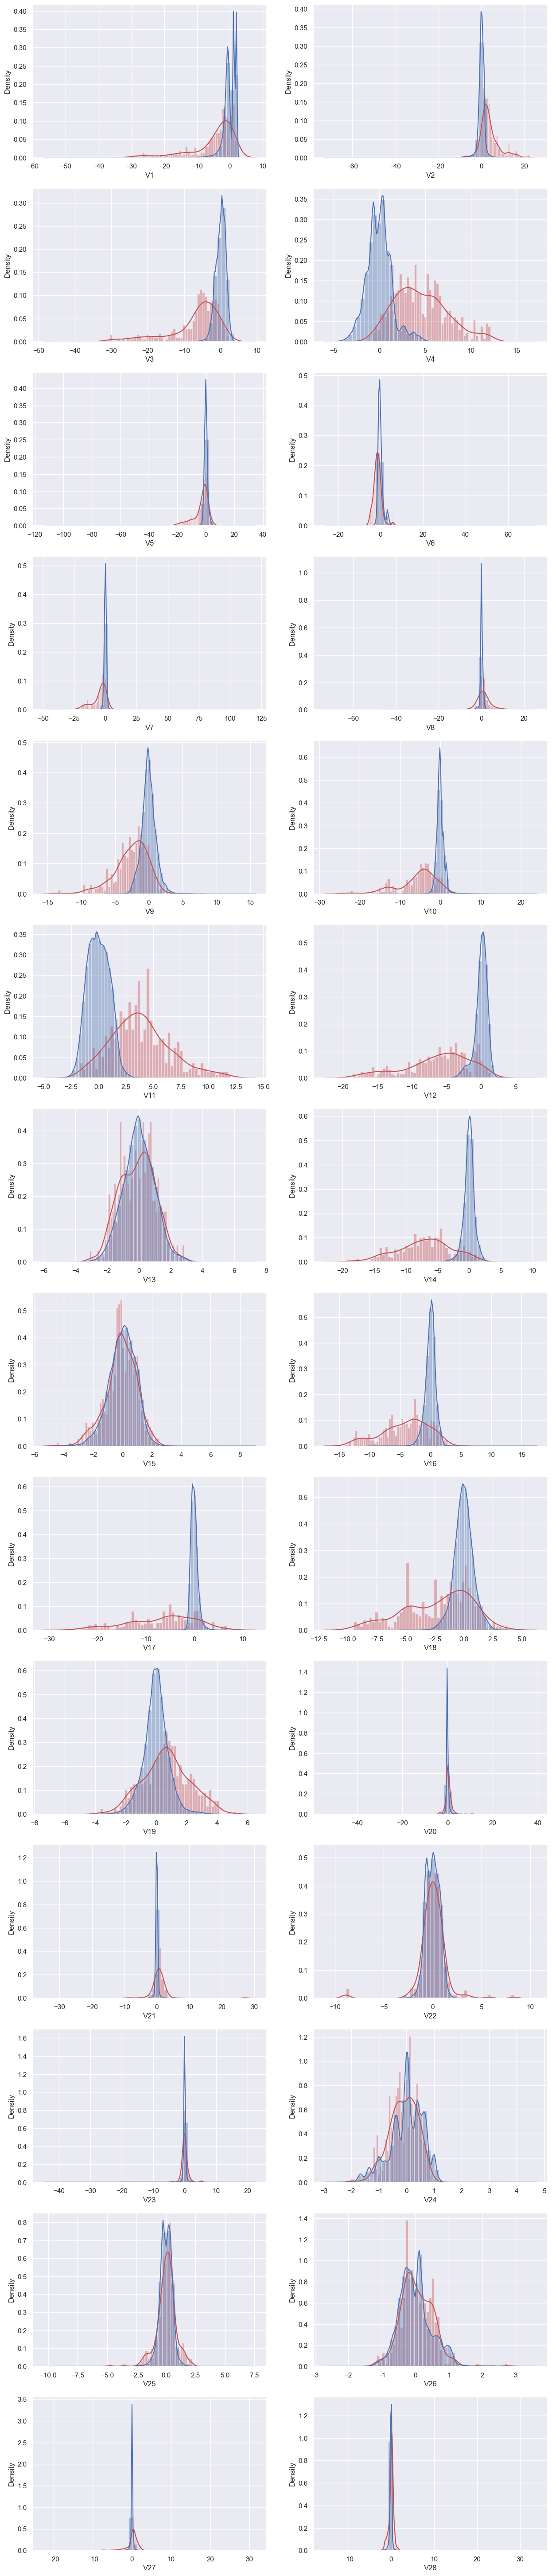

In [9]:
# Armazenando as colunas das variáveis explicativas em uma variável (num_cols)
num_cols = df.columns[1:29]

print('Distribuição das colunas')

# Definindo o tamanho dos gráficos
plt.figure(figsize=(15, 80))
# plotando histogramas para cada uma das features
for i, col in tqdm.tqdm_notebook(enumerate(num_cols)):
    plt.subplot(15, 2, i + 1)
    sns.distplot(df[col][df['Class'] == 1], bins=50, color='r') # Fraudulenta --> vermelho
    sns.distplot(df[col][df['Class'] == 0], bins=50) # Não-fraudulenta --> azul

Percebe-se que algumas variáveis sao muito semelhantes em distribuição, ou seja, não nos fornece muita informação com relação as diferenças entre transações fraudulentas ou não-fraudulentas, sao elas:

> 'V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'


Em contrapartida, as outras parecem conter informações importantes para o nosso futuro modelo de ML, são elas:

> 'V21','V19','V18','V17','V16','V14','V12','V11','V10','V9','V7','V6','V5','V4','V3','V2','V1'

In [10]:
# Verificando a correlação (em módulo) das features com o target ('Class')
corr_target = df.corr().unstack()['Class'].abs().sort_values(ascending=False)
corr_target

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
dtype: float64

Analisando a correlação entre as as features e o target, confirma-se que as features que apresentavam distribuição distintas entre fraudulentas e não fraudulentas podem nos ajudar a resolver o problema proposto.

O plano, a partir daqui, será:
> - (1) Criar outras variáveis, binárias (featuring eng.), para cada uma dessas variáveis mais explicativas e...

> - (2) Talvez, descartar aquelas pouco representativas.